In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Building a training set generator
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.2)
#Building a test set generator
test_datagen = ImageDataGenerator(rescale=1./255)
#Apply the training generator on the test set and specify the validation set to be 20% of the entire train set available
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Programming/Projects/Computer Vision/train',subset='training',target_size=(128,128),batch_size=32,class_mode='categorical',shuffle=True)
#Obtain the 20% validation set from the train folder
val_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Programming/Projects/Computer Vision/train',subset='validation',target_size=(128,128),batch_size=32,class_mode='categorical',shuffle=True)



Found 3803 images belonging to 12 classes.
Found 947 images belonging to 12 classes.


So there are 12 classes.

Training set has 3803 images.

Validation set has 947 images.

In [8]:
training_set.class_indices

{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}

In [9]:
val_set.class_indices

{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}

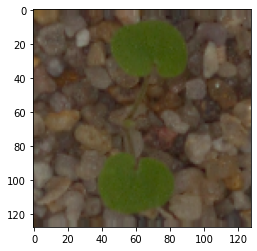

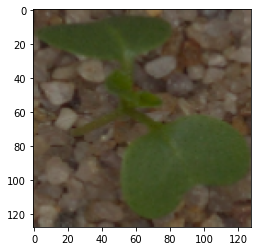

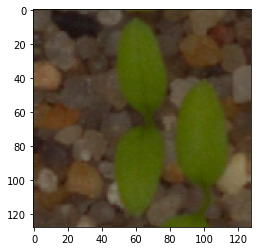

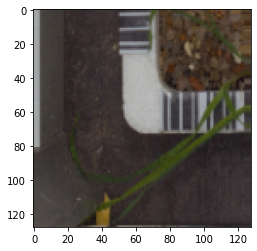

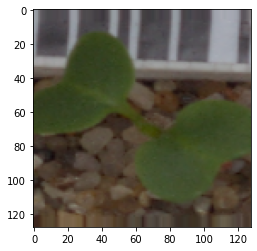

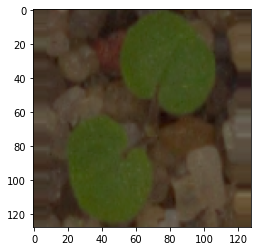

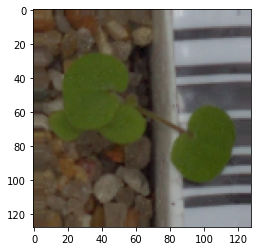

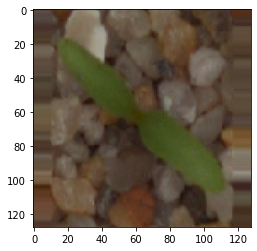

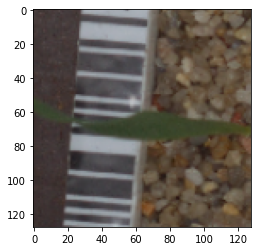

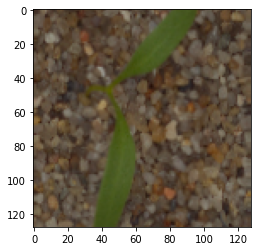

In [10]:
import matplotlib.pyplot as plt
x,y = training_set.next()
for i in range(0,10):
    image = x[i]
    plt.imshow(image)
    plt.show()
    x,y = training_set.next()

# SVM Model

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Building a training set generator
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.2)
#Building a test set generator
test_datagen = ImageDataGenerator(rescale=1./255)
#Apply the training generator on the test set and specify the validation set to be 20% of the entire train set available
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Programming/Projects/Computer Vision/train',subset='training',target_size=(128,128),batch_size=32,class_mode='sparse',shuffle=True)
#Obtain the 20% validation set from the train folder
val_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Programming/Projects/Computer Vision/train',subset='validation',target_size=(128,128),batch_size=32,class_mode='sparse',shuffle=True)

Found 3803 images belonging to 12 classes.
Found 947 images belonging to 12 classes.


In [12]:
import numpy as np
x_train=np.concatenate([training_set.next()[0] for i in range(training_set.__len__())])
y_train=np.concatenate([training_set.next()[1] for i in range(training_set.__len__())])
print(x_train.shape)
print(y_train.shape)

(3803, 128, 128, 3)
(3803,)


In [13]:
x_test=np.concatenate([val_set.next()[0] for i in range(val_set.__len__())])
y_test=np.concatenate([val_set.next()[1] for i in range(val_set.__len__())])
print(x_test.shape)
print(y_test.shape)

(947, 128, 128, 3)
(947,)


In [14]:
x_train1=[]
for i in range(len(x_train)):
    x_train1.append(x_train[i].flatten())
    
x_train1 = np.array(x_train1)

y_train1=[]
for i in range(len(y_train)):
    y_train1.append(y_train[i].flatten())
    
y_train1 = np.array(y_train1)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(x_train1)
xpca = pca.transform(x_train1)

In [16]:
from sklearn import svm

clf = svm.SVC(gamma=0.025, C=3) 

clf.fit(xpca , y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
x_test1=[]
for i in range(len(x_test)):
    x_test1.append(x_test[i].flatten())
    
x_test1 = np.array(x_test1)
xpcatest = pca.transform(x_test1)

y_pred = clf.predict(xpcatest)

from sklearn.metrics import accuracy_score
print("Accuracy for SVM model =",accuracy_score(y_test,y_pred))

Accuracy for SVM model = 0.11087645195353749


# NN Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import regularizers,optimizers


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Building a training set generator
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.2)
#Building a test set generator
test_datagen = ImageDataGenerator(rescale=1./255)
#Apply the training generator on the test set and specify the validation set to be 20% of the entire train set available
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Programming/Projects/Computer Vision/train',subset='training',target_size=(128,128),batch_size=32,class_mode='categorical',shuffle=True)
#Obtain the 20% validation set from the train folder
val_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Programming/Projects/Computer Vision/train',subset='validation',target_size=(128,128),batch_size=32,class_mode='categorical',shuffle=True)

Found 3803 images belonging to 12 classes.
Found 947 images belonging to 12 classes.


In [20]:
classifier_nn = Sequential()
classifier_nn.add(Flatten())
classifier_nn.add(Dense(units=1024,activation='relu'))
classifier_nn.add(Dense(units=512,activation='relu'))
classifier_nn.add(Dense(256,activation='relu'))
classifier_nn.add(Dense(128,activation='relu'))
classifier_nn.add(Dense(units=64,activation='relu'))
classifier_nn.add(Dense(units=12,activation='softmax'))

sgd =optimizers.Adam()
classifier_nn.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [21]:
#Saving the best model using model checkpoint callback
import tensorflow
model_checkpoint2=tensorflow.keras.callbacks.ModelCheckpoint('plant_seedings_nn.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose = 1)

In [22]:
history2 = classifier_nn.fit_generator(training_set,steps_per_epoch=int(3816/32),epochs=40,validation_data=val_set,validation_steps=int(951/32),callbacks=[model_checkpoint2])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
119/119 [==============================] - 85s 715ms/step - loss: 5.8626 - accuracy: 0.1147 - val_loss: 2.4486 - val_accuracy: 0.1412
Epoch 2/40
119/119 [==============================] - 84s 706ms/step - loss: 2.3550 - accuracy: 0.1673 - val_loss: 2.1985 - val_accuracy: 0.2360
Epoch 3/40
119/119 [==============================] - 83s 698ms/step - loss: 2.1955 - accuracy: 0.2145 - val_loss: 2.1086 - val_accuracy: 0.2263
Epoch 4/40
119/119 [==============================] - 83s 697ms/step - loss: 2.0405 - accuracy: 0.2536 - val_loss: 1.9483 - val_accuracy: 0.3028
Epoch 5/40
119/119 [==============================] - 82s 692ms/step - loss: 1.9520 - accuracy: 0.2995 - val_loss: 1.9746 - val_accuracy: 0.2759
Epoch 6/40
119/119 [==============================] - 81s 680ms/step - loss: 1.9228 - accuracy: 0.3077 - val_loss: 1.9012 - val_accuracy: 0.3254
Epoch 7/40
119/119 [==============================] - 80s 676ms/step - loss: 1.8086 - accuracy: 0.3395 - val_loss: 1.8232 - val_ac

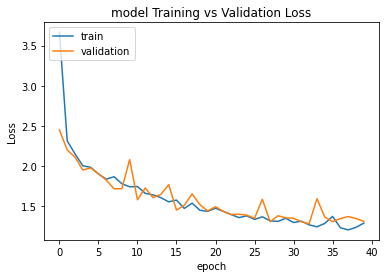

In [23]:
# "Loss"
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

plt.title('model Training vs Validation Loss')

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

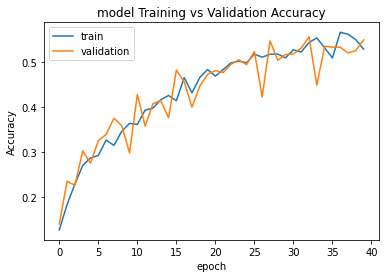

In [24]:
# "Accuracy"
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

plt.title('model Training vs Validation Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

# CNN Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [26]:
classifier = Sequential()
classifier.add(Conv2D(64,(3,3),input_shape =(128,128,3),activation='relu',padding='same'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(64,(3,3),activation='relu',padding='same'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(64,(3,3),activation='relu',padding='same'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(64,(3,3),activation='relu',padding='same'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=512,activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=12,activation='softmax'))

In [27]:
opt=Adam(lr=0.001)
classifier.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
#Saving the best model using model checkpoint callback
import tensorflow
model_checkpoint=tensorflow.keras.callbacks.ModelCheckpoint('plant_seedings.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose = 1)

In [29]:
history = classifier.fit_generator(training_set,steps_per_epoch=int(3816/32),epochs=40,validation_data=val_set,validation_steps=int(951/32),callbacks=[model_checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
119/119 [==============================] - 105s 649ms/step - loss: 2.4136 - accuracy: 0.1488 - val_loss: 1.7344 - val_accuracy: 0.3987
Epoch 2/40
119/119 [==============================] - 76s 641ms/step - loss: 1.6949 - accuracy: 0.4199 - val_loss: 1.4850 - val_accuracy: 0.4763
Epoch 3/40
119/119 [==============================] - 76s 638ms/step - loss: 1.4792 - accuracy: 0.4854 - val_loss: 1.1882 - val_accuracy: 0.5916
Epoch 4/40
119/119 [==============================] - 76s 643ms/step - loss: 1.2551 - accuracy: 0.5600 - val_loss: 1.0109 - val_accuracy: 0.6573
Epoch 5/40
119/119 [==============================] - 76s 639ms/step - loss: 1.0413 - accuracy: 0.6324 - val_loss: 0.9277 - val_accuracy: 0.6875
Epoch 6/40
119/119 [==============================] - 76s 640ms/step - loss: 0.9282 - accuracy: 0.6694 - val_loss: 0.8701 - val_accuracy: 0.7155
Epoch 7/40
119/119 [==============================] - 76s 638ms/step - loss: 0.8126 - accuracy: 0.7201 - val_loss: 0.6683 - val_a

In [30]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


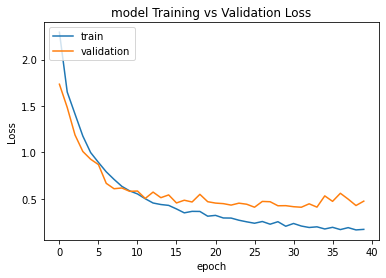

In [31]:
# "Loss"
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model Training vs Validation Loss')

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

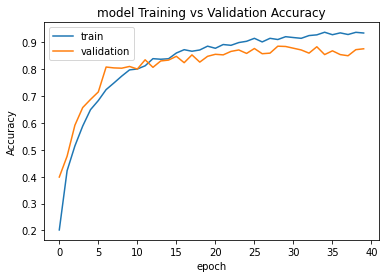

In [32]:
# "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model Training vs Validation Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

#### Here we are getting highest accuracy for CNN model , so we will use cnn modle for predicting our output
#### Also for svm we are using pca for feature extraction , but pca is not able to extract as much deature required for predicting an image , also if we increase the number of components then , it will take time to fit the model for svm .

In [33]:
import cv2 
test_image = cv2.imread('/content/drive/MyDrive/Programming/Projects/Computer Vision/Predict.png')
test_image = cv2.resize(test_image,(128,128))

In [34]:
test_image.shape

(128, 128, 3)

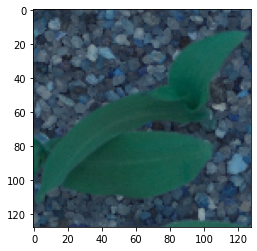

In [35]:
plt.imshow(test_image)

In [36]:
import numpy as np
test_image = np.expand_dims(test_image,axis=0)
test_image = test_image*1/255.0

In [37]:
result = classifier.predict(test_image*1/255.0)

In [38]:
result

array([[2.3661359e-04, 5.9301741e-10, 1.2206101e-08, 2.8620908e-04,
        6.1209518e-02, 1.2344384e-07, 6.0922362e-02, 8.7729996e-01,
        4.2118324e-07, 3.7149401e-09, 4.2820044e-05, 2.0004370e-06]],
      dtype=float32)

In [39]:
classes_dict = training_set.class_indices

In [40]:
classes_dict

{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}

In [41]:
prediction_class = []
for class_name,index in classes_dict.items():
    prediction_class.append(class_name)

In [42]:
prediction_class

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [43]:
predicted_index = np.argmax(result[0])

In [44]:
print(prediction_class[predicted_index])

Maize


### Loose silky bent is the predicted class for the image

### We will save the best performing model

In [45]:
#Set the path where you want to store the model and weights 
classifier.save('plant_seedings.h5')
classifier.save_weights('plant_seedings_weights.h5')

**Supervised Approach:**
    In a supervised approach, the performance of the model is mainly dependent on the input features. However in this case i.e., in case of images the task of extracting features from an image is an tedious task. And different problems require different features. The features will have to be well defined in this approach as the model outcome is highly dependent on these features.
    
**Neural network:**
    Here in this case also the features have to be defined. So it makes the task quite difficult and depending on features we have defined the output will vary. As we can see in the above case we had just flattened the input image and fed into a fully connected layer and the results are not very great.
    
**CNN:**
    Using a CNN gave us better results than using a FC-NN.
    The main advantage of using CNN is that the filters will be learned to generate required features related to the problem we are solving. At the beginning or by the initial filters more generalised attributes will be obtained from filters and at the later convolutional layers, more specific or features of utmost important might be learned and we need not define our own features. This makes the whole feature extraction and prediction process as learnable.
    
**Benifits of CNN :**
CNN is better than a feed-forward network since CNN has feature parameter sharing and dimentionality reduction , due to which , number of parameters is decreased and the computations are also reduced